In [1]:
# import dos dados
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# transformando csv em data frame
df = pd.read_csv("https://media.githubusercontent.com/media/fbarth/ml-espm/master/dataset/20140917_imoveis_filtrados_final.csv_shaped.csv")
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


In [2]:
df.shape

(3760, 7)

In [3]:
df.isna().sum()

bairro         0
preco          0
area           0
suites         0
dormitorios    0
banheiros      0
vagas          0
dtype: int64

In [4]:
from sklearn import preprocessing

# one_hot para os bairros
df = pd.concat([df,pd.get_dummies(df['bairro'], prefix='bairro',dummy_na=True)],axis=1).drop(['bairro'],axis=1)

price = df.pop('preco')

# normalizando dados
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df), 
                              index=df.index, 
                              columns=df.columns
                             )

# fazendo fit da regressao linear
model = LinearRegression().fit(df, price)

In [5]:
print(model.intercept_)
print(model.coef_)

-1.5289496755464804e+19
[ 2.09844603e+06  7.65384705e+05 -4.78264770e+05  2.42368639e+04
  1.34923841e+06  1.52894968e+19  1.52894968e+19  1.52894968e+19
  1.52894968e+19  1.52894968e+19  0.00000000e+00]


In [6]:
y_predicted = model.predict(df)
rmse = mean_squared_error(price, y_predicted)
r2 = r2_score(price, y_predicted)
print(rmse)
print(r2)
print('Mean Absolute Error:', mean_absolute_error(price, y_predicted)) 

235921893601.24707
0.7954072988450827
Mean Absolute Error: 336747.2146276596


In [7]:
price.describe()

count    3.760000e+03
mean     1.554187e+06
std      1.073982e+06
min      2.800000e+05
25%      8.500000e+05
50%      1.200000e+06
75%      1.880000e+06
max      8.000000e+06
Name: preco, dtype: float64

<AxesSubplot:ylabel='Frequency'>

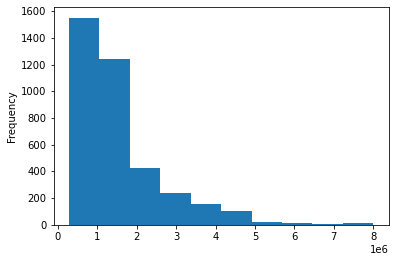

In [10]:
price.plot(kind='hist')

In [17]:
import numpy as np
df1 = pd.DataFrame(data = np.c_[price, y_predicted], columns = ['true','predicted'])
df1['erro'] = np.abs(df1['true'] - df1['predicted'])
df1.head()

,true,predicted,erro
0,490000.0,1093632.0,603632.0
1,3180000.0,2430976.0,749024.0
2,1900000.0,3037184.0,1137184.0
3,3565000.0,3100672.0,464328.0
4,1605000.0,1873920.0,268920.0


<AxesSubplot:ylabel='Frequency'>

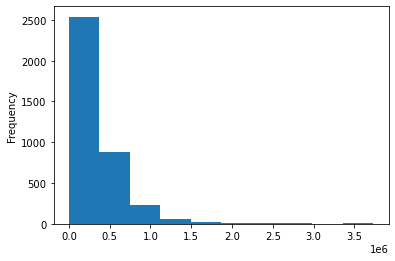

In [18]:
df1['erro'].plot(kind='hist')

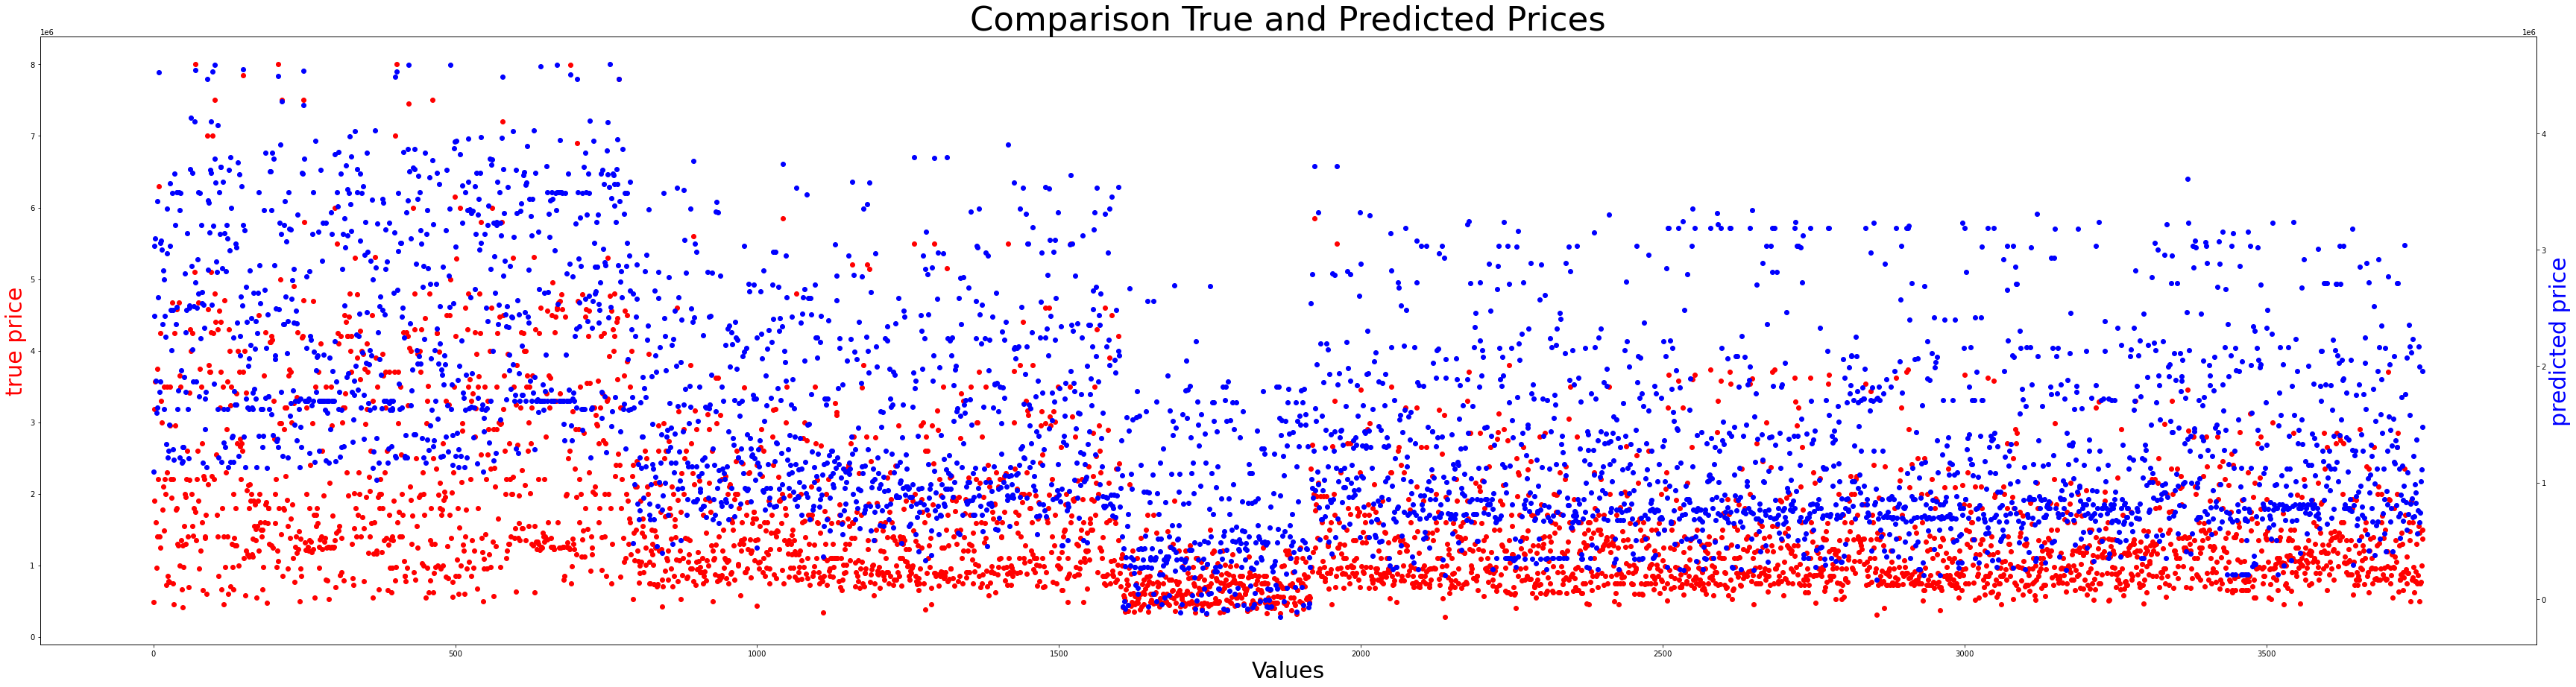

In [12]:
import matplotlib.pyplot as plt
# adaptei codigo daqui:
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.scatter(df1.index.values, df1['true'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Values",fontsize=30)
# set y-axis label
ax.set_ylabel("true price",color="red",fontsize=30)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(df1.index.values, df1['predicted'],color="blue",marker="o")
ax2.set_ylabel("predicted price",color="blue",fontsize=30)
fig.set_size_inches(60, 15)
plt.title('Comparison True and Predicted Prices',fontsize=45)
plt.show()